In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def read_emissivity(filename):
    """Read an emissivity output file into a pandas DataFrame.

    Columns written by emissivity.cpp:
        r, area, n_rays, flux, emissivity, redshift, time
    Rows with no ray hits (n_rays == 0) are dropped.
    """
    df = pd.read_csv(
        filename,
        sep=r'\s+',
        header=None,
        names=['r', 'area', 'n_rays', 'flux', 'emissivity', 'redshift', 'time'],
    )
    return df[df['n_rays'] > 0].reset_index(drop=True)

In [ ]:
df = read_emissivity('../dat/emissivity_test.dat')
#df.head()
df2 = read_emissivity('../dat/emissivity_test_neg_en.dat')
df3 = read_emissivity('../dat/emissivity_test_pt.dat')
df4 = read_emissivity('../dat/emissivity_test_rk45.dat')
df5 = read_emissivity('../dat/emissivity_test_rk45_pt.dat')
df6 = read_emissivity('../dat/emissivity_test_euler_pt.dat')
df7 = read_emissivity('../dat/emissivity_test_euler_neg_en.dat')

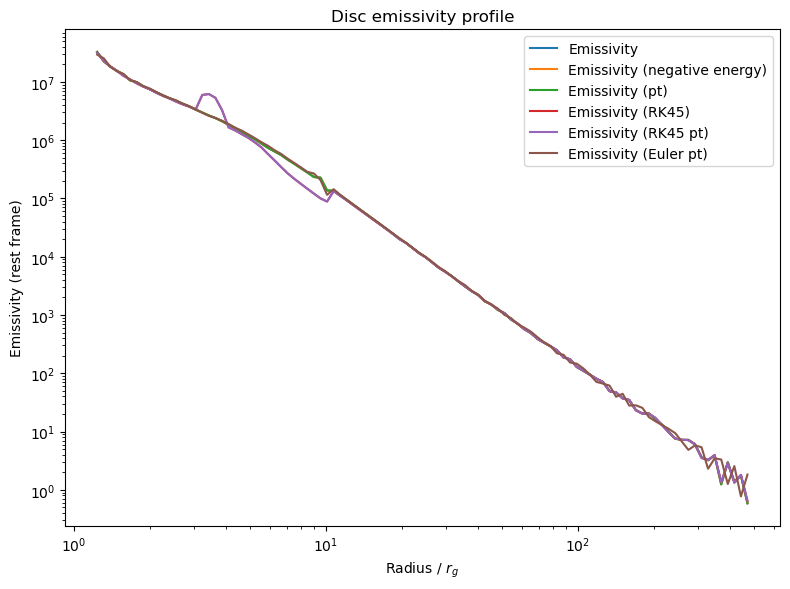

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.loglog(df['r'], df['emissivity'], label='Emissivity')
ax.loglog(df2['r'], df2['emissivity'], label='Emissivity (negative energy)')
ax.loglog(df3['r'], df3['emissivity'], label='Emissivity (pt)')
ax.loglog(df4['r'], df4['emissivity'], label='Emissivity (RK45)')
ax.loglog(df5['r'], df5['emissivity'], label='Emissivity (RK45 pt)')
ax.loglog(df6['r'], df6['emissivity'], label='Emissivity (Euler pt)')

ax.set_xlabel(r'Radius / $r_g$')
ax.set_ylabel(r'Emissivity (rest frame)')
ax.set_title('Disc emissivity profile')
ax.legend()

plt.tight_layout()
plt.show()

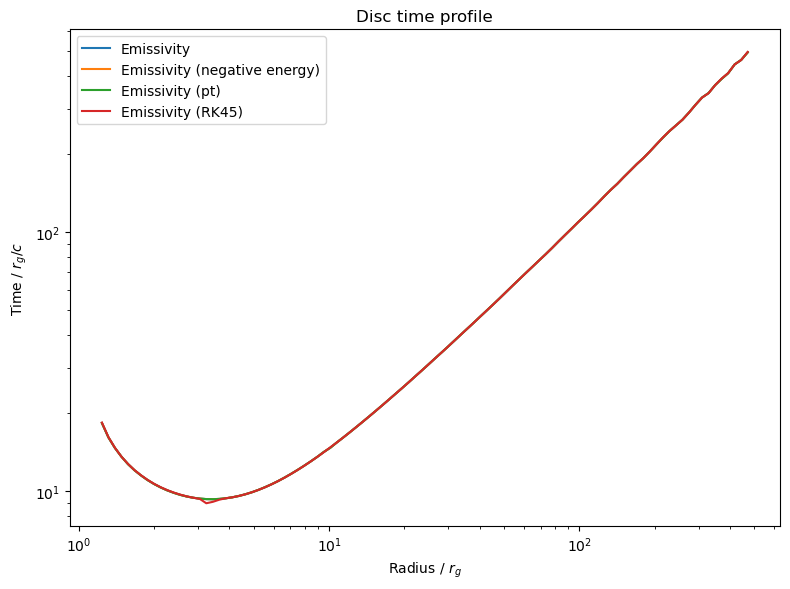

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.loglog(df['r'], df['time'], label='Emissivity')
ax.loglog(df2['r'], df2['time'], label='Emissivity (negative energy)')
ax.loglog(df3['r'], df3['time'], label='Emissivity (pt)')
ax.loglog(df4['r'], df4['time'], label='Emissivity (RK45)')

ax.set_xlabel(r'Radius / $r_g$')
ax.set_ylabel(r'Time / $r_g/c$')
ax.set_title('Disc time profile')
ax.legend()

plt.tight_layout()
plt.show()

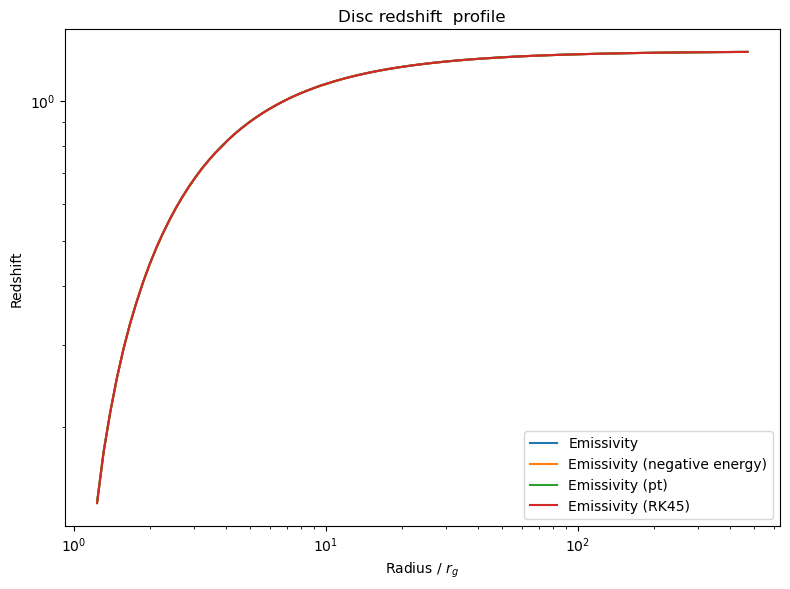

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.loglog(df['r'], df['redshift'], label='Emissivity')
ax.loglog(df2['r'], df2['redshift'], label='Emissivity (negative energy)')
ax.loglog(df3['r'], df3['redshift'], label='Emissivity (pt)')
ax.loglog(df4['r'], df4['redshift'], label='Emissivity (RK45)')

ax.set_xlabel(r'Radius / $r_g$')
ax.set_ylabel(r'Redshift')
ax.set_title('Disc redshift  profile')
ax.legend()

plt.tight_layout()
plt.show()